# 국민건강보험공단_건강검진정보_2021_12 분석
건강검진 결과지 제대로 읽는 법


https://health.chosun.com/site/data/html_dir/2016/11/30/2016113001291.html

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

url1="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_1.CSV"
url2="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_2.CSV"
url3="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_3.CSV"
url4="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_4.CSV"

import pandas as pd

검진정보1=pd.read_csv(url1)
검진정보2=pd.read_csv(url2)
검진정보3=pd.read_csv(url3)
검진정보4=pd.read_csv(url4)

검진정보 = 검진정보1.append(검진정보2).append(검진정보3).append(검진정보4)


검진정보 = 검진정보1.append(검진정보2).append(검진정보3).append(검진정보4)
df = 검진정보.copy()
df

dic1 = {11 : '서울특별시',
26 : '부산광역시',
27 : '대구광역시',
28 : '인천광역시',
29 : '광주광역시',
30 : '대전광역시',
31 : '울산광역시',
36 : '세종특별자치시',
41 : '경기도',
42 : '강원도',
43 : '충청북도',
44 : '충청남도',
45 : '전라북도',
46 : '전라남도',
47 : '경상북도' ,
48 : '경상남도',
49 : '제주특별자치도'}


age_list = ['0~4세','5~9세','10~14세',
                '15~19세','20~24세','25~29세',
                '30~34세','35~39세','40~44세',
                '45~49세','50~54세','55~59세',
                '60~64세','65~69세','70~74세',
               '75~79세','80~84세','85세 이상']

# 코드 변환 후 새로운 칼럼 추가, 기존 코드 칼럼 삭제
df['시도명'] = df['시도코드'].apply(lambda x : dic1[x])
df.drop('시도코드', axis=1, inplace=True)
df['연령대'] = df['연령대 코드(5세단위)'].apply(lambda x:age_list[x-1])
df.drop('연령대 코드(5세단위)', axis=1, inplace=True)
df['성별'] = df['성별코드'].apply(lambda x:'남자' if x==1 else '여자')
df.drop('성별코드', axis=1, inplace=True)

# 필요없는 칼럼 삭제
df.drop(['기준년도','가입자 일련번호','데이터 공개일자'], axis=1, inplace=True)

#시도명, 연령대, 성별 칼럼 맨 앞으로 가져오기
검진정보_copy1 = df[['시도명', '연령대', '성별']]
검진정보_copy2 = df.loc[:,'신장(5Cm단위)':'치석']
검진정보_merge = pd.concat([검진정보_copy1, 검진정보_copy2], axis=1)
검진정보_merge = 검진정보_merge.reset_index(drop = True) 


# merge한 데이터 검진정보_copy에 저장
df = 검진정보_merge.copy()

#당뇨병 
df['당뇨병'] = '의심'
con1 = (df['식전혈당(공복혈당)'] >= 126)
con2 = (df['식전혈당(공복혈당)'] <= 120) & (df['식전혈당(공복혈당)'] >= 70)
con3 = df['식전혈당(공복혈당)'].isnull()
df.loc[con1,"당뇨병"] = '비정상'
df.loc[con2, '당뇨병'] = '정상'
df.loc[con3, '당뇨병'] = '미관측'

#저혈당
# http://www.samsunghospital.com/dept/main/index.do?DP_CODE=DM&MENU_ID=008037
df['저혈당']= '정상'
con1 = (df['식전혈당(공복혈당)'] < 70)
con2 = (df['식전혈당(공복혈당)'].isnull())
df.loc[con1,"저혈당"] = '비정상'
df.loc[con2,"저혈당"] = '미관측'

# 간 기능 이상
df['간 기능 이상'] = '의심'
con1 = ((df['(혈청지오티)AST'] >= 51)|(df['(혈청지오티)ALT'] >= 46))
con2 = ((df['(혈청지오티)AST'] <= 32) & (df['(혈청지오티)ALT'] <= 32))
con3 = (df['(혈청지오티)AST'].isnull()) & (df['(혈청지오티)ALT'].isnull())
df.loc[con1,'간 기능 이상'] = '비정상'
df.loc[con2,'간 기능 이상'] = '정상'
df.loc[con3, '간 기능 이상'] = '미관측'

#고혈압
df['고혈압']= '의심'
con1 = (df['수축기 혈압'] < 120) & (df['이완기 혈압'] < 80)
con2 = (df['수축기 혈압'] >= 145) | (df['이완기 혈압'] >=95)
con3 = (df['수축기 혈압'].isnull()) | (df['이완기 혈압'].isnull())
df.loc[con1,"고혈압"] = '정상'
df.loc[con3,"고혈압"] = '미관측'
df.loc[con2,"고혈압"] = '비정상'

#저혈압 
#https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=32144
df["저혈압"] = '미관측'
con1 = (df['수축기 혈압'] < 120) & (df['이완기 혈압'] < 80) #정상
con2 = (df['수축기 혈압'] < 100)  & (df['이완기 혈압'] < 60) #비정상
con3 = (df['수축기 혈압'].isnull()) | (df['이완기 혈압'].isnull()) | (df['수축기 혈압'] >= 120) & (df['이완기 혈압'] >= 80)#미관측

df.loc[con1,"저혈압"] = '정상'
df.loc[con3,"저혈압"] = '미관측'
df.loc[con2,"저혈압"] = '비정상'

# 이상지질혈증
df['이상지질혈증HDL'] = df['HDL 콜레스테롤'].apply(lambda x:'yes' if 60 > x else 'no')
df['이상지질혈증LDL'] = df['LDL 콜레스테롤'].apply(lambda x:'yes' if 130 < x else 'no')

df['이상지질혈증'] = '미관측'

HDLcon = df['이상지질혈증HDL']=='yes'
LDLcon = df['이상지질혈증LDL']=='yes'
df.loc[HDLcon|LDLcon, '이상지질혈증'] = '비정상'

con1 = df['HDL 콜레스테롤'].isnull()
con2 = df['LDL 콜레스테롤'].isnull()
df.loc[con1,'이상지질혈증HDL'] = '미관측'
df.loc[con2,'이상지질혈증LDL'] = '미관측'

HDLcon2 = df['이상지질혈증HDL']=='no'
LDLcon2 = df['이상지질혈증LDL']=='no'
df.loc[HDLcon2&LDLcon2, '이상지질혈증'] = '정상'

# 비만
BMI = df['체중(5Kg 단위)'] / (df['신장(5Cm단위)']*0.01)**2
cond1 = (BMI <= 18.5)
cond2 = ((BMI > 18.5) & (BMI <= 23.0))
cond3 = ((BMI > 23.0) & (BMI <= 25.0))
cond4 = (BMI > 25.0)

df.loc[cond1, '비만'] = "저체중"
df.loc[cond2, '비만'] = "정상"
df.loc[cond3, '비만'] = "과체중"
df.loc[cond4, '비만'] = "고도비만"

df.head(1)

,시도명,연령대,성별,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,치석,당뇨병,저혈당,간 기능 이상,고혈압,저혈압,이상지질혈증HDL,이상지질혈증LDL,이상지질혈증,비만
0,세종특별자치시,40~44세,남자,165,60,72.1,1.2,1.5,1.0,1.0,...,NaN,정상,정상,정상,의심,미관측,yes,no,비정상,정상


In [2]:
df[['(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피']].corr()

,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피
(혈청지오티)AST,1.000000,0.741916,0.320785
(혈청지오티)ALT,0.741916,1.000000,0.362289
감마 지티피,0.320785,0.362289,1.000000


In [64]:
# 혈청지오티인 AST와 ALT로 알코올남용자를 찾을 수 있다.
# .
'''
감마지티피(GGT) : 0 - 40IU/L(인터네셔널 유닛)가 정상범위, 대부분 간에서 유래하는 데이터
주어진 감마지티피만으로는 사실 간질환이나 여타 질환들을 유추해내기에는 무리가 있다.
하지만 주어진 감마지티피로 ast와의 비율 조정을 통해서 알코올남용자를 찾을 수 있다.
혈청지오티인 AST와 ALT로 알코올남용자를 찾을 수 있다.

ast alt는 낮고 감마지티피만 높다면 다소 심각하지는 않지만
ast alt가 높고 감마지티피토 높다면 심각한 간기능 이상이다.


데이터를 기반으로 한 알코올 남용자 분석법

AST가 높은 수치이고 (AST/ALT)가 2 이상일 때,
'''


df['알코올남용'] = '비남용자'
cond1 = (df['(혈청지오티)AST'] >= 51)
cond3 = (df['(혈청지오티)AST'] / df['(혈청지오티)ALT'] >= 2)
cond4 = (df['감마 지티피'] >= 50)
cond5 = (df['감마 지티피'] / df['(혈청지오티)ALT'] >= 2.5)
cond6 = (df['음주여부'] == 1)

'''
AST/ALT비율이 2 이상인 경우 알코올성 간질환을 강하게 시사함.
또한 r-GTP가 상승하고 r-GTP/ALT> 2.5이상이여도 강하게 시사함.
ALT는 범위에 포함시키지 않은 이유는 알코올때문에 ALT와 관련이 있는
PYRIDOXAL PHOSPHATE가 부족해지기 때문이다.


인산피리독살(P5P 또는 PYRIDIXAL PHOSPHATE 또는 비타민B6)은 알라닌 전이효소(ALT)의
완전한 촉매 활성에 필요한 보조인자.
'''


df.loc[cond1&cond3&cond6, '알코올남용'] = '남용자'
df.loc[cond1&cond4&cond5&cond6, '알코올남용'] = '남용자'
df.groupby('알코올남용').count()['음주여부'].to_frame()

,음주여부
알코올남용,
남용자,9271
비남용자,990533


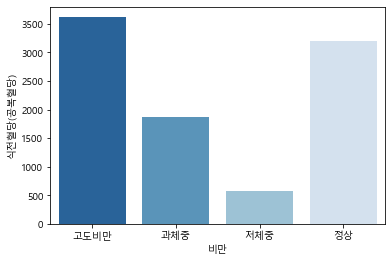

In [65]:
df_fat_alcoholic = df.groupby(['알코올남용', '비만']).count()[:4][['식전혈당(공복혈당)']].reset_index()
df_fat_alcoholic.sort_values(by = '알코올남용')

sns.barplot(x='비만', y = '식전혈당(공복혈당)', data=df_fat_alcoholic, palette='Blues_r')
plt.show()

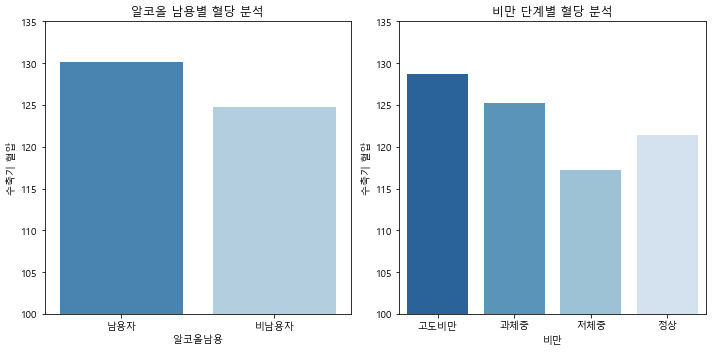

In [118]:
df_alcohol_highpress = df.groupby('알코올남용').mean()[['수축기 혈압', '이완기 혈압']].reset_index()


# sns.barplot(x= '알코올남용', y = ['수축기 혈압', '이완기 혈압'], data=df_alcohol_highpress, palette='coolwarm')
# plt.show()
df_alcohol_highpress


plt.figure(figsize = (10,5))
a = plt.subplot(1,2,1)

sns.barplot(x= '알코올남용', y = '수축기 혈압', data=df_alcohol_highpress, palette='Blues_r')
plt.title('알코올 남용별 혈당 분석')

plt.subplot(1,2,2, sharey = a)
sns.barplot(x= '비만', y = '수축기 혈압', data=df_fat_highpress, palette='Blues_r')
plt.title('비만 단계별 혈당 분석')
plt.ylim([100, 135])
plt.tight_layout()
plt.show()



# plt.figure(figsize = (10,5))
# a = plt.subplot(1,2,1)
# sns.barplot(x='알코올남용', y = '식전혈당(공복혈당)', data=df_alcohol_insulin, palette='Blues_r')
# plt.title('알코올 남용별 혈당 분석')

# plt.subplot(1,2,2, sharey = a)
# sns.barplot(x='비만', y = '식전혈당(공복혈당)', data=df_fat_insulin, palette='Blues_r')
# plt.title('비만 단계별 혈당 분석')
# plt.ylim([100, 120])
# plt.tight_layout()
# plt.show()

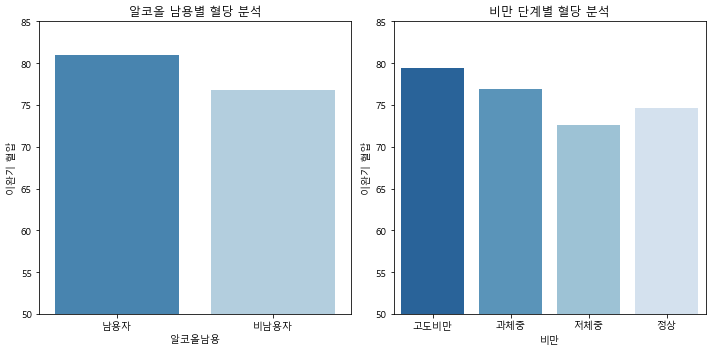

In [123]:
plt.figure(figsize = (10,5))
a = plt.subplot(1,2,1)

sns.barplot(x= '알코올남용', y = '이완기 혈압', data=df_alcohol_highpress, palette='Blues_r')
plt.title('알코올 남용별 혈당 분석')

plt.subplot(1,2,2, sharey = a)
sns.barplot(x= '비만', y = '이완기 혈압', data=df_fat_highpress, palette='Blues_r')
plt.title('비만 단계별 혈당 분석')
plt.ylim([50, 85])
plt.tight_layout()
plt.show()

In [109]:
df_fat_highpress = df.groupby('비만').mean()[['수축기 혈압', '이완기 혈압']].reset_index()
df_fat_highpress

,비만,수축기 혈압,이완기 혈압
0,고도비만,128.752286,79.369591
1,과체중,125.265105,76.922309
2,저체중,117.271577,72.601582
3,정상,121.388356,74.614527


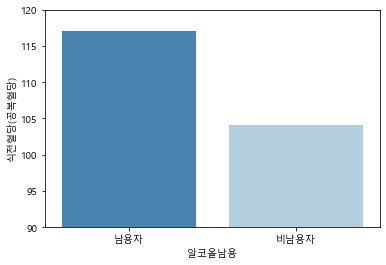

In [98]:
df_alcohol_insulin = df.groupby('알코올남용').mean()[['식전혈당(공복혈당)']].reset_index()
plt.ylim([90, 120])
df_alcohol_insulin
# sns.barplot(x='알코올남용', y = '식전혈당(공복혈당)', data=df_alcohol_insulin, palette='Blues_r')
# plt.show()

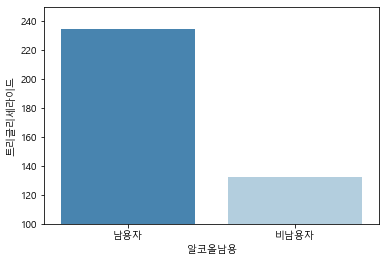

In [104]:
df_alcohol_tri = df.groupby('알코올남용').mean()[['트리글리세라이드']].reset_index()
plt.ylim([100, 250])

sns.barplot(x='알코올남용', y = '트리글리세라이드', data=df_alcohol_tri, palette='Blues_r')
plt.show()


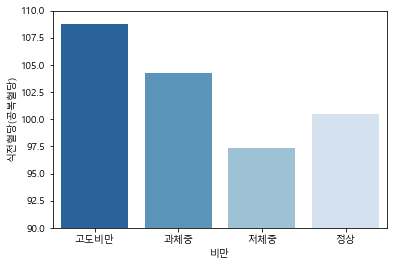

In [96]:
df_fat_insulin = df.groupby('비만').mean()[['식전혈당(공복혈당)']].reset_index()
plt.ylim([90, 110])
sns.barplot(x='비만', y = '식전혈당(공복혈당)', data=df_fat_insulin, palette='Blues_r')
plt.show()

In [ ]:
sns.barplot(x='비만', y = '식전혈당(공복혈당)', data=df_fat_insulin, palette='Blues_r')
plt.show()

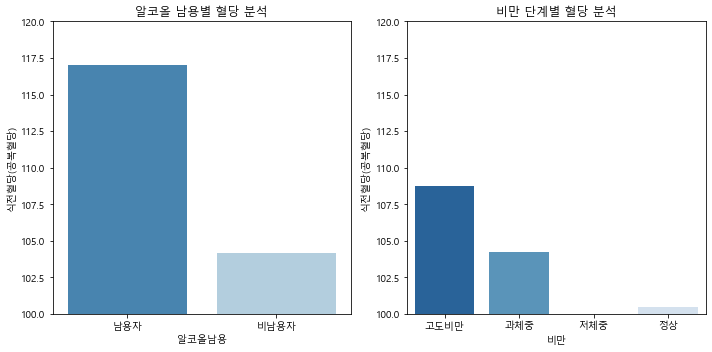

In [99]:
# df_alcohol_insulin = df.groupby('알코올남용').mean()[['식전혈당(공복혈당)']].reset_index()
# df_alcohol_insulin
# sns.barplot(x='알코올남용', y = '식전혈당(공복혈당)', data=df_alcohol_insulin, palette='Blues_r')
# plt.show()


# df_fat_insulin = df.groupby('비만').mean()[['식전혈당(공복혈당)']].reset_index()
# sns.barplot(x='비만', y = '식전혈당(공복혈당)', data=df_fat_insulin, palette='Blues_r')
# plt.show()
plt.figure(figsize = (10,5))
a = plt.subplot(1,2,1)
sns.barplot(x='알코올남용', y = '식전혈당(공복혈당)', data=df_alcohol_insulin, palette='Blues_r')
plt.title('알코올 남용별 혈당 분석')

plt.subplot(1,2,2, sharey = a)
sns.barplot(x='비만', y = '식전혈당(공복혈당)', data=df_fat_insulin, palette='Blues_r')
plt.title('비만 단계별 혈당 분석')
plt.ylim([100, 120])
plt.tight_layout()
plt.show()

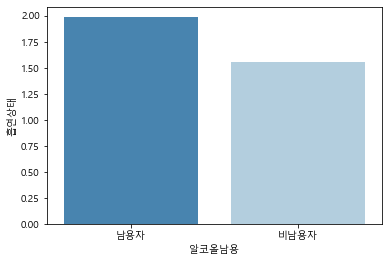

,알코올남용,흡연상태
0,남용자,1.984492
1,비남용자,1.555873


In [6]:
df_alcohol_smoke = df.groupby('알코올남용').mean()[['흡연상태']].reset_index()
sns.barplot(x='알코올남용', y = '흡연상태', data=df_alcohol_smoke, palette='Blues_r')
plt.show()
df_alcohol_smoke

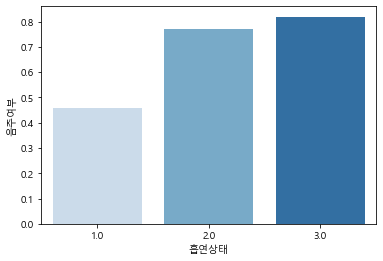

In [7]:
df_drunk_smoke = df.groupby('흡연상태').mean()[['음주여부']].reset_index()
sns.barplot(x='흡연상태', y = '음주여부', data=df_drunk_smoke, palette='Blues')
plt.show()

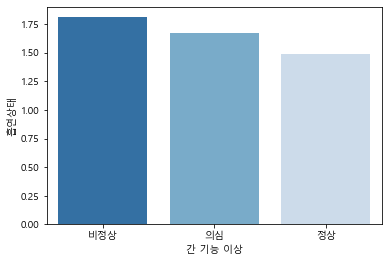

,간 기능 이상,흡연상태
1,비정상,1.809411
2,의심,1.676022
3,정상,1.492768


In [8]:
df_livererr_smoke = df.groupby('간 기능 이상').mean()[['흡연상태']].reset_index()
df_livererr_smoke = df_livererr_smoke.drop(0)
sns.barplot(x='간 기능 이상', y = '흡연상태', data=df_livererr_smoke, palette='Blues_r')
plt.show()
df_livererr_smoke

In [10]:
df.groupby('당뇨병').count()[['식전혈당(공복혈당)']]

,식전혈당(공복혈당)
당뇨병,
미관측,0
비정상,105231
의심,31575
정상,855592


In [9]:
df_gender_smoke = df.groupby('gender').mean()[['흡연상태']]
df_gender_smoke

KeyError: 'gender'

In [ ]:
df.groupby('gender').mean()[['음주여부']]

In [ ]:
df_drunk_smoke_gender = df.groupby(['흡연상태', 'gender']).mean()[['음주여부']].reset_index()
sns.barplot(x='흡연상태', y = '음주여부', hue='gender', data=df_drunk_smoke_gender, palette='Blues_r')
plt.show()

In [ ]:
df[['흡연상태', '음주여부']].corr()